In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


Using CellProfiler, we obtained masked pixels representing the cell borders in the VE-Cad channel.

The masked images used in this notebook have non-zero values at the borders.


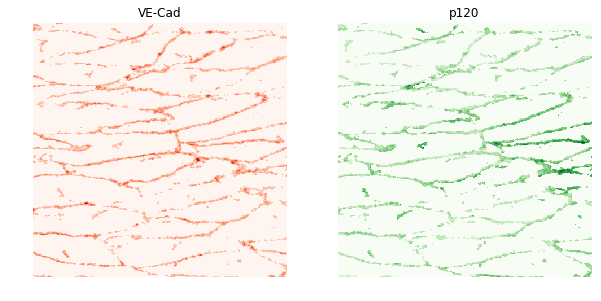

In [2]:
from skimage import io

imdir = "../data/"
imgarrayR = io.imread(imdir + "Image_28-1_crop_maskred.tiff")
imgarrayG = io.imread(imdir + "Image_28-1_crop_maskgreen.tiff")

imgarray = [imgarrayR, imgarrayG]

colors = ["Reds", "Greens"]
names = ["VE-Cad", "p120"]
fig, ax = plt.subplots(1, 2, figsize=(10,10))

for i, (color, name) in enumerate(zip(colors, names)):
    ax[i].imshow(imgarray[i], cmap=color)
    ax[i].set_title(name)
    ax[i].set_axis_off()



We want to compare the average intensity at the cell borders for each channel.

There's no need to include regions beyond the border, so we can use boolean indexing to find the non-zero array elements.

In [3]:
np.average(imgarrayG[imgarrayG != 0])

17545.379533260068

In [4]:
np.average(imgarrayR[imgarrayR != 0])

11390.396502682785

Split images into wild type and mutant

In [5]:
wt_num = np.arange(17, 21 + 1)
mut_num = np.arange(22, 28 + 1)

wt_red_imgs = ["../data/Image_{}-1_crop_maskred.tiff".format(n)
              for n in wt_num]
wt_green_imgs = ["../data/Image_{}-1_crop_maskgreen.tiff".format(n)
              for n in wt_num]

mut_red_imgs = ["../data/Image_{}-1_crop_maskred.tiff".format(n)
              for n in mut_num]
mut_green_imgs = ["../data/Image_{}-1_crop_maskgreen.tiff".format(n)
              for n in mut_num]

In [6]:
wt = {}
wt["number"] = wt_num
wt_red_img_arrays = [io.imread(x) for x in wt_red_imgs]
wt_green_img_arrays = [io.imread(x) for x in wt_green_imgs]
wt["type"] = ["wt" for x in wt_num]
wt["avg_red_intensity"] = [np.average(x[x != 0]) for x in wt_red_img_arrays]
wt["avg_green_intensity"] = [np.average(x[x != 0]) for x in wt_green_img_arrays]

In [7]:
mut = {}
mut["number"] = mut_num
mut_red_img_arrays = [io.imread(x) for x in mut_red_imgs]
mut_green_img_arrays = [io.imread(x) for x in mut_green_imgs]
mut["type"] = ["mut" for x in mut_num]
mut["avg_red_intensity"] = [np.average(x[x != 0]) for x in mut_red_img_arrays]
mut["avg_green_intensity"] = [np.average(x[x != 0]) for x in mut_green_img_arrays]

In [8]:
aggregations = {"avg_red_intensity"  :["mean", "std", "sem"],
                "avg_green_intensity":["mean", "std", "sem"]
                }

In [9]:
wt_df = pd.DataFrame.from_dict(wt)

wt_agg = wt_df.agg(aggregations)
wt_agg

,avg_red_intensity,avg_green_intensity
mean,23861.952311,36298.031080
std,2287.275947,5956.514658
sem,1022.900900,2663.834337


In [10]:
mut_df = pd.DataFrame.from_dict(mut)
mut_agg = mut_df.agg(aggregations)
mut_agg

,avg_red_intensity,avg_green_intensity
mean,9393.866469,15284.811218
std,2581.007410,2105.630453
sem,975.529105,795.853504


In [11]:
def makebarplot(wt_agg, mut_agg, use_sem=False):
    
    wt_means  = wt_agg.loc["mean"]
    mut_means = mut_agg.loc["mean"]
    
    wt_stds  = wt_agg.loc["std"]
    mut_stds = mut_agg.loc["std"]
    
    wt_sems  = wt_agg.loc["sem"]
    mut_sems = mut_agg.loc["sem"]
    
    wt_errors  = wt_sems  if use_sem else wt_stds
    mut_errors = mut_sems if use_sem else mut_stds

    N = len(wt_means)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    capsize = 4
    
    rects_wt = ax.bar(ind, wt_means,
                      width, yerr = wt_errors,
                      capsize = capsize,
                     )
    rects_mut = ax.bar(ind + width,
                       mut_means, width, yerr = mut_errors,
                       capsize = capsize,
                      )
    
    ax.set_ylabel("Intensity")
    ax.set_title("Cell Border Intensities in Aorta")
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(("VE-Cad", "p120"))
    ax.set_ylim([0, 45000])
    ax.legend((rects_wt[0], rects_mut[0]), ("Wild Type.", "GGG Mutant"))
    

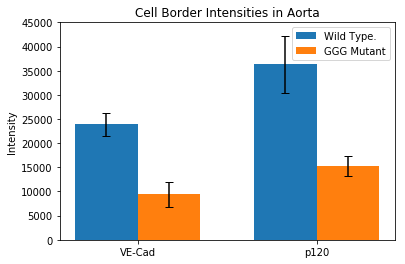

In [12]:
makebarplot(wt_agg, mut_agg, use_sem=False)
plt.savefig("../plots/barplot_std.png")
plt.savefig("../plots/barplot_std.pdf")

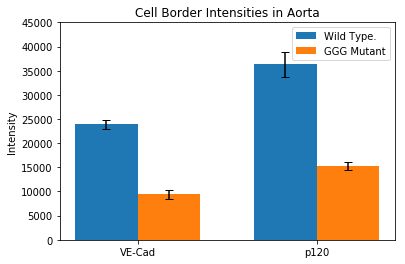

In [13]:
makebarplot(wt_agg, mut_agg, use_sem=True)
plt.savefig("../plots/barplot_sem.png")
plt.savefig("../plots/barplot_sem.pdf")

In [14]:
df = pd.concat([wt_df, mut_df], ignore_index=True)
df.to_csv("../csv_data/ve-cad_p120_intensity_data.csv", index=False)
df

,avg_green_intensity,avg_red_intensity,number,type
0,27029.698251,22677.686775,17,wt
1,39593.148456,24212.862792,18,wt
2,40247.978188,23561.742892,19,wt
3,33600.784965,21373.551077,20,wt
4,41018.545540,27483.918021,21,wt
5,12797.608455,9069.583672,22,mut
6,16780.799484,12624.074651,23,mut
7,17053.087748,5186.630354,24,mut
8,14724.057894,7324.877885,25,mut
9,15857.317759,8958.501453,26,mut


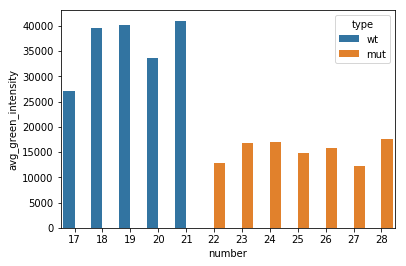

In [15]:
g = sns.barplot(x = "number", y = "avg_green_intensity",
                data = df, hue = "type")

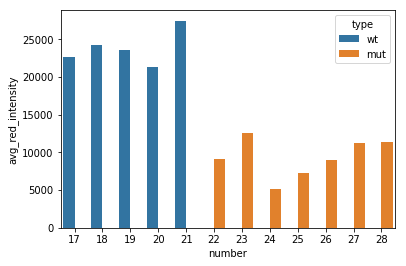

In [16]:
r = sns.barplot(x = "number", y = "avg_red_intensity",
                data = df, hue = "type")

### Statistical test

We will be using `Welch's t-test` which tests whether or not two populations have equal means. It is similar to Student's t-test, but Welch's version performs better when the samples have unequal variances and sample sizes.

Note that `scipy.stats.ttest_ind` returns a two-tailed p-value, but we suspect that the average intensities from wild type > mutant. We can divide the two-tailed p-value in half to receive the one-tailed p-value.


In [17]:
from scipy.stats import ttest_ind

# p120 intensity comparison
_, p_val_green_two = ttest_ind(wt_df["avg_green_intensity"],
                               mut_df["avg_green_intensity"],
                               axis=0, equal_var=False)

# VE-Cad intensity comparison
_, p_val_red_two = ttest_ind(wt_df["avg_red_intensity"],
                             mut_df["avg_red_intensity"],
                             axis=0, equal_var=False)

p_val_green = p_val_green_two / 2
p_val_red = p_val_red_two / 2

### Conclusion


In [18]:
diff_green = wt_df["avg_green_intensity"].mean() - mut_df["avg_green_intensity"].mean()
diff_red = wt_df["avg_red_intensity"].mean() - mut_df["avg_red_intensity"].mean()

print("On average, p120 intensity difference is {:.0f} with p-value: {:.5f}".format(diff_green, p_val_green))
print("On average, VE-Cad intensity difference is {:.0f} with p-value: {:.7f}".format(diff_red, p_val_red))

On average, p120 intensity difference is 21013 with p-value: 0.00041
On average, VE-Cad intensity difference is 14468 with p-value: 0.0000010
